# Education Dropout

### Libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn import svm


from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import VotingClassifier

### Load the dataset

In [3]:
ds = pd.read_csv('data.csv',sep=';')

In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

The dataset consists of 4424 rows and columns.

In [5]:
# Renaming columns
ds.rename(columns = {'Nacionality':'Nationality', 'Age at enrollment':'Age'}, inplace = True)
# Encoding target column
ds.Target = ds.Target.map({
    'Dropout':0,
    'Enrolled':1,
    'Graduate':2
})

### EDA

Null Value Analysis

In [6]:
pd.DataFrame({'Total Null':ds.isnull().sum(),'Percent':ds.isnull().sum()/len(ds)*100})


,Total Null,Percent
Marital status,0,0.0
Application mode,0,0.0
Application order,0,0.0
Course,0,0.0
Daytime/evening attendance\t,0,0.0
Previous qualification,0,0.0
Previous qualification (grade),0,0.0
Nationality,0,0.0
Mother's qualification,0,0.0
Father's qualification,0,0.0


The dataset has no null values.

In [7]:
for column in ds.columns:
    print(column)
    print(ds[column].unique())

Marital status
[1 2 4 3 5 6]
Application mode
[17 15  1 39 18 53 44 51 43  7 42 16  5  2 10 57 26 27]
Application order
[5 1 2 4 3 6 9 0]
Course
[ 171 9254 9070 9773 8014 9991 9500 9238 9670 9853 9085 9130 9556 9147
 9003   33 9119]
Daytime/evening attendance	
[1 0]
Previous qualification
[ 1 19 42 39 10  3 40  2  4 12 43 15  6  9 38  5 14]
Previous qualification (grade)
[122.  160.  100.  133.1 142.  119.  137.  138.  139.  136.  133.  110.
 149.  127.  135.  140.  125.  126.  151.  115.  150.  143.  130.  120.
 103.  154.  132.  167.  129.  141.  116.  148.  118.  106.  121.  114.
 124.  123.  113.  111.  131.  158.  146.  117.  153.  178.   99.  134.
 128.  170.  155.  145.  152.  112.  107.  156.  188.   96.  161.  166.
 147.  144.  102.  101.  180.  172.  105.  108.  165.  190.  162.  164.
 163.  159.  117.4 175.  133.8 176.  168.  139.3  97.  157.  140.8 184.4
 148.9 109.  174.  182.  138.6  95.  154.4 163.3 145.7 123.9 124.4 169.
 177.  138.7 119.1 118.9 126.6]
Nationality
[  1 

In [8]:
ds.Target.value_counts(normalize=True)

Target
2    0.499322
0    0.321203
1    0.179476
Name: proportion, dtype: float64

<Axes: xlabel='Target'>

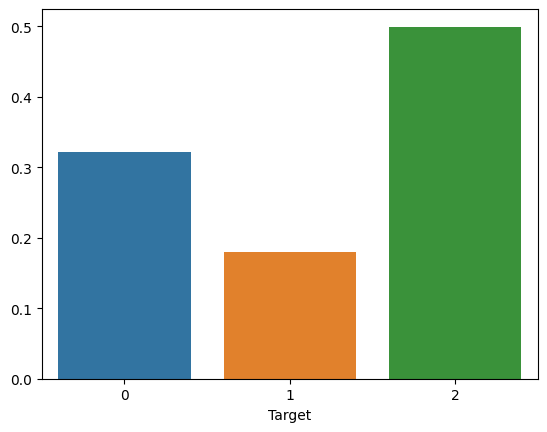

In [9]:
sns.barplot(x=ds.Target.value_counts(normalize=True).index, y=ds.Target.value_counts(normalize=True).values)

50% of the data is marked as graduate, while only 18% is listed as still enrolled. We will have to treat the data accordingly.

### Correlation Heatmap

c:\Users\shara\Desktop\EducationDropoutClassification\EduDrop\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
c:\Users\shara\Desktop\EducationDropoutClassification\EduDrop\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


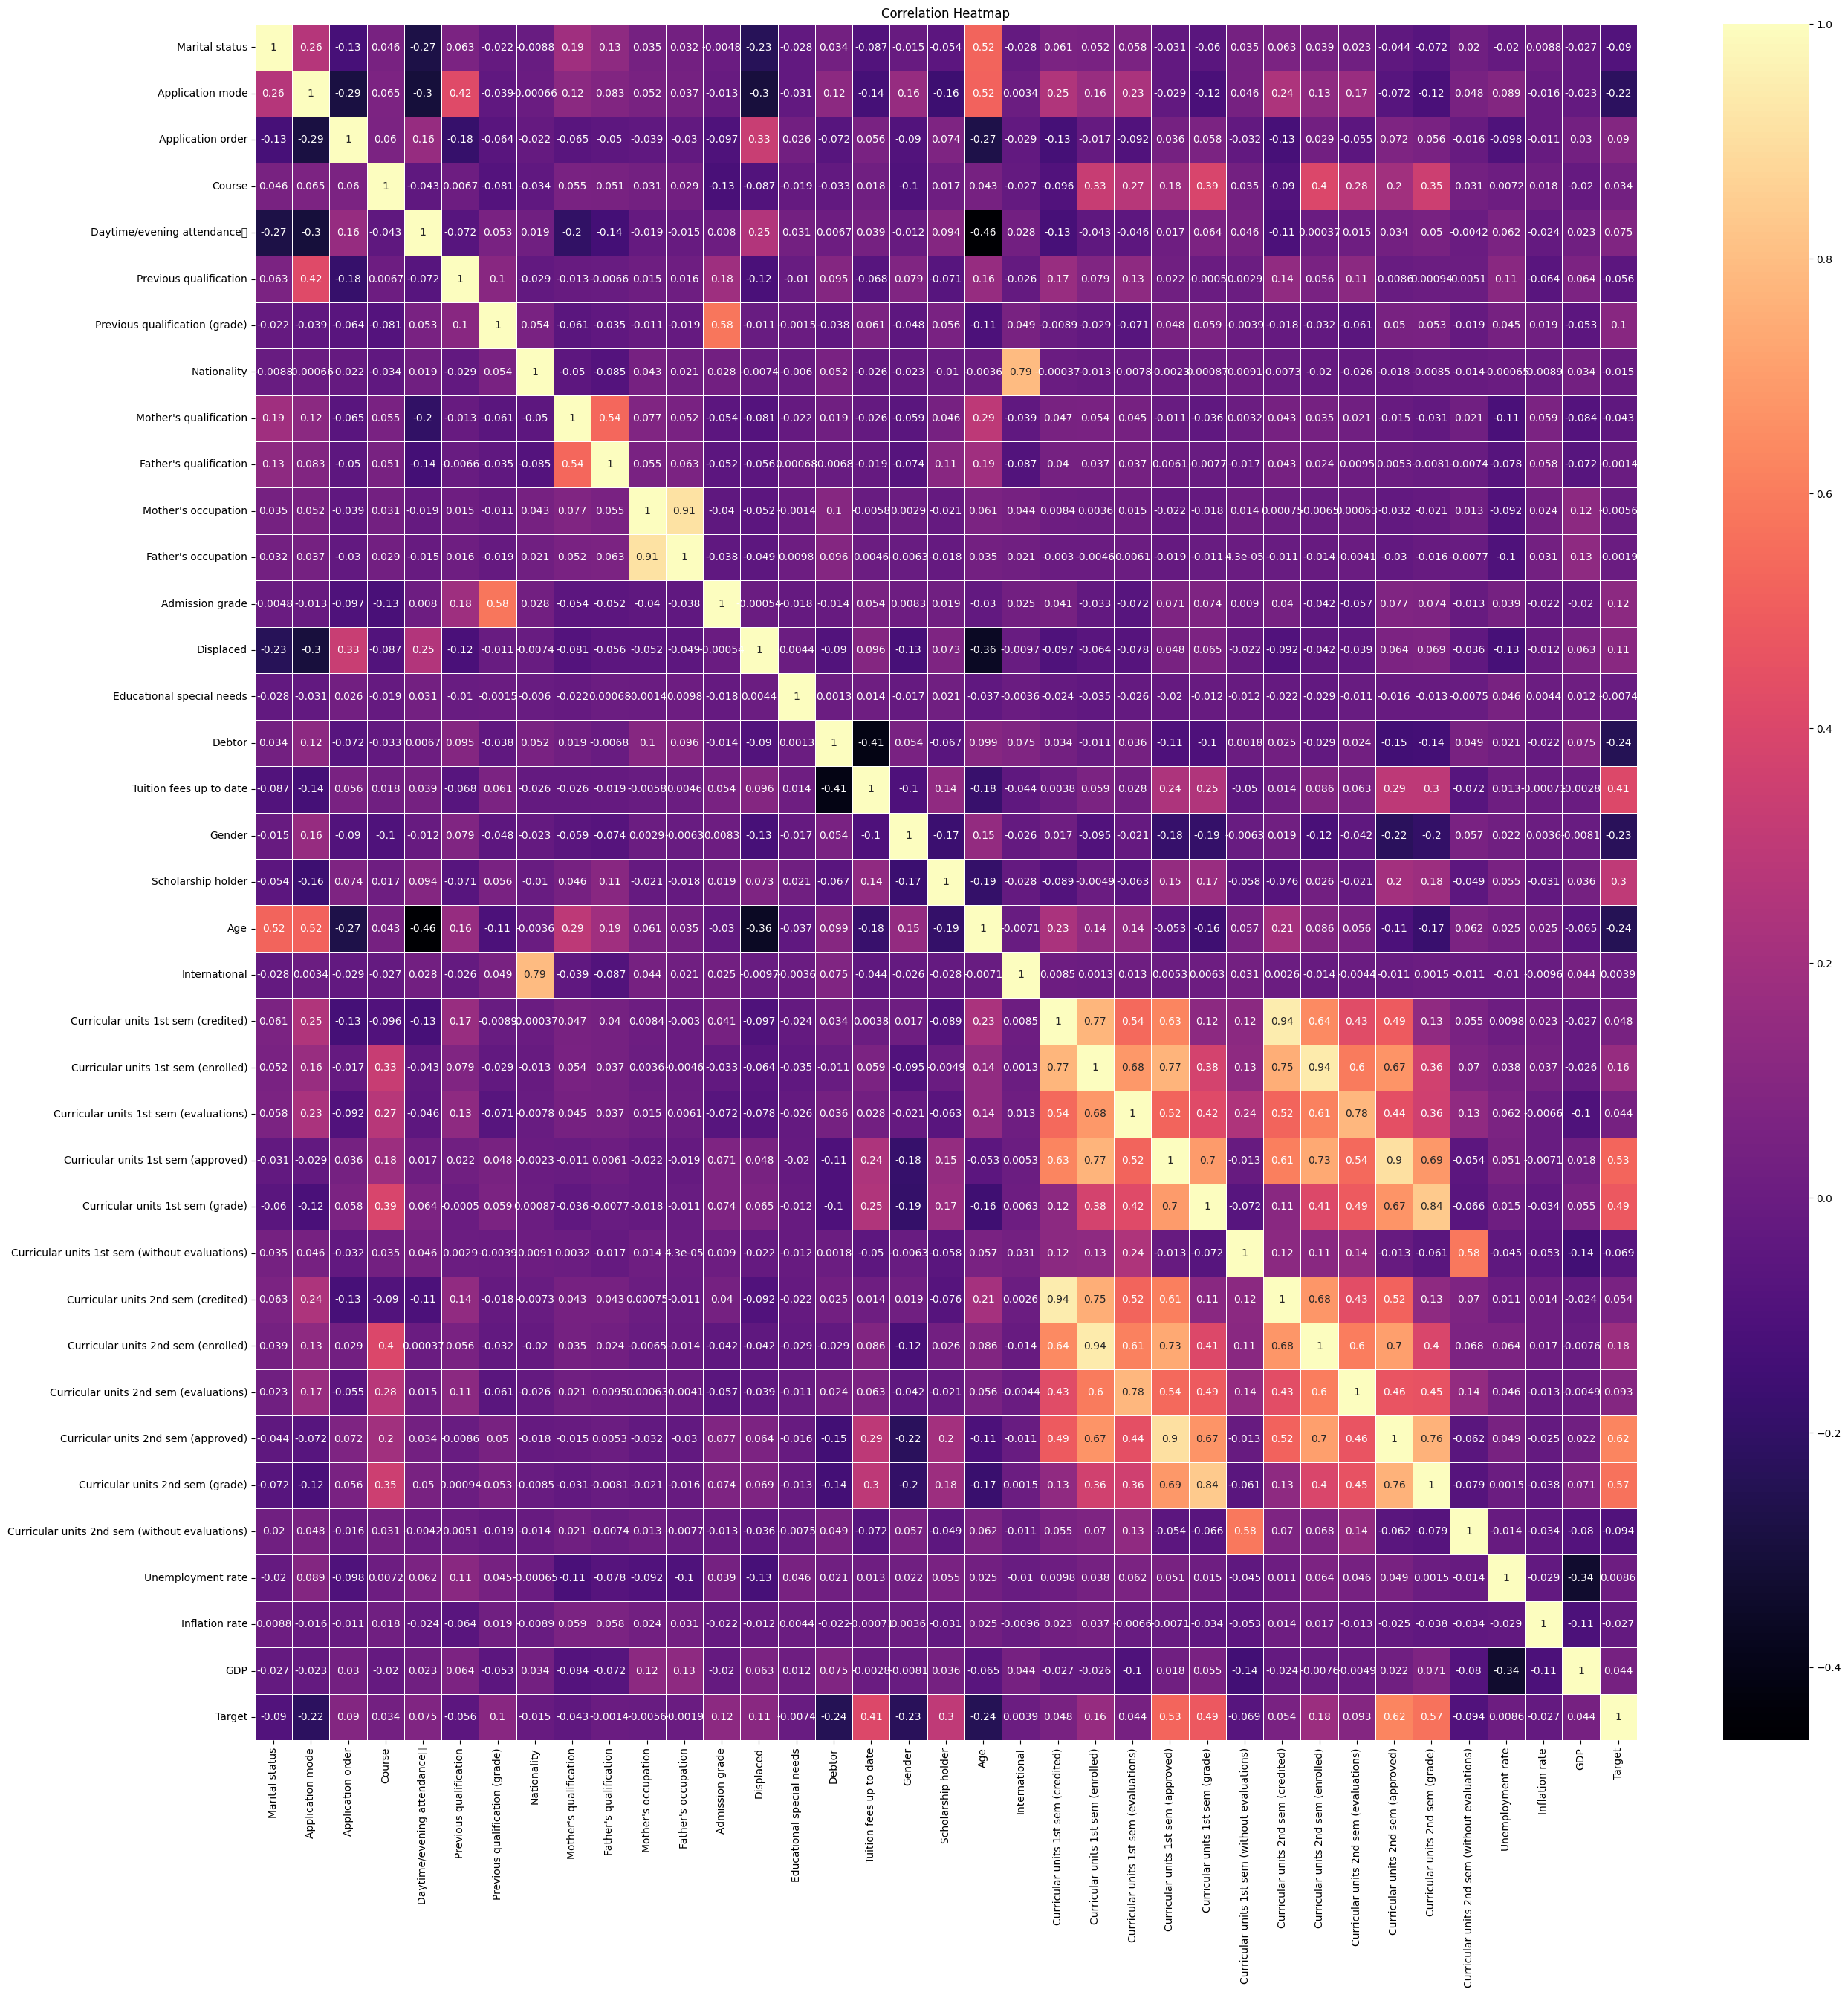

c:\Users\shara\Desktop\EducationDropoutClassification\EduDrop\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
c:\Users\shara\Desktop\EducationDropoutClassification\EduDrop\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


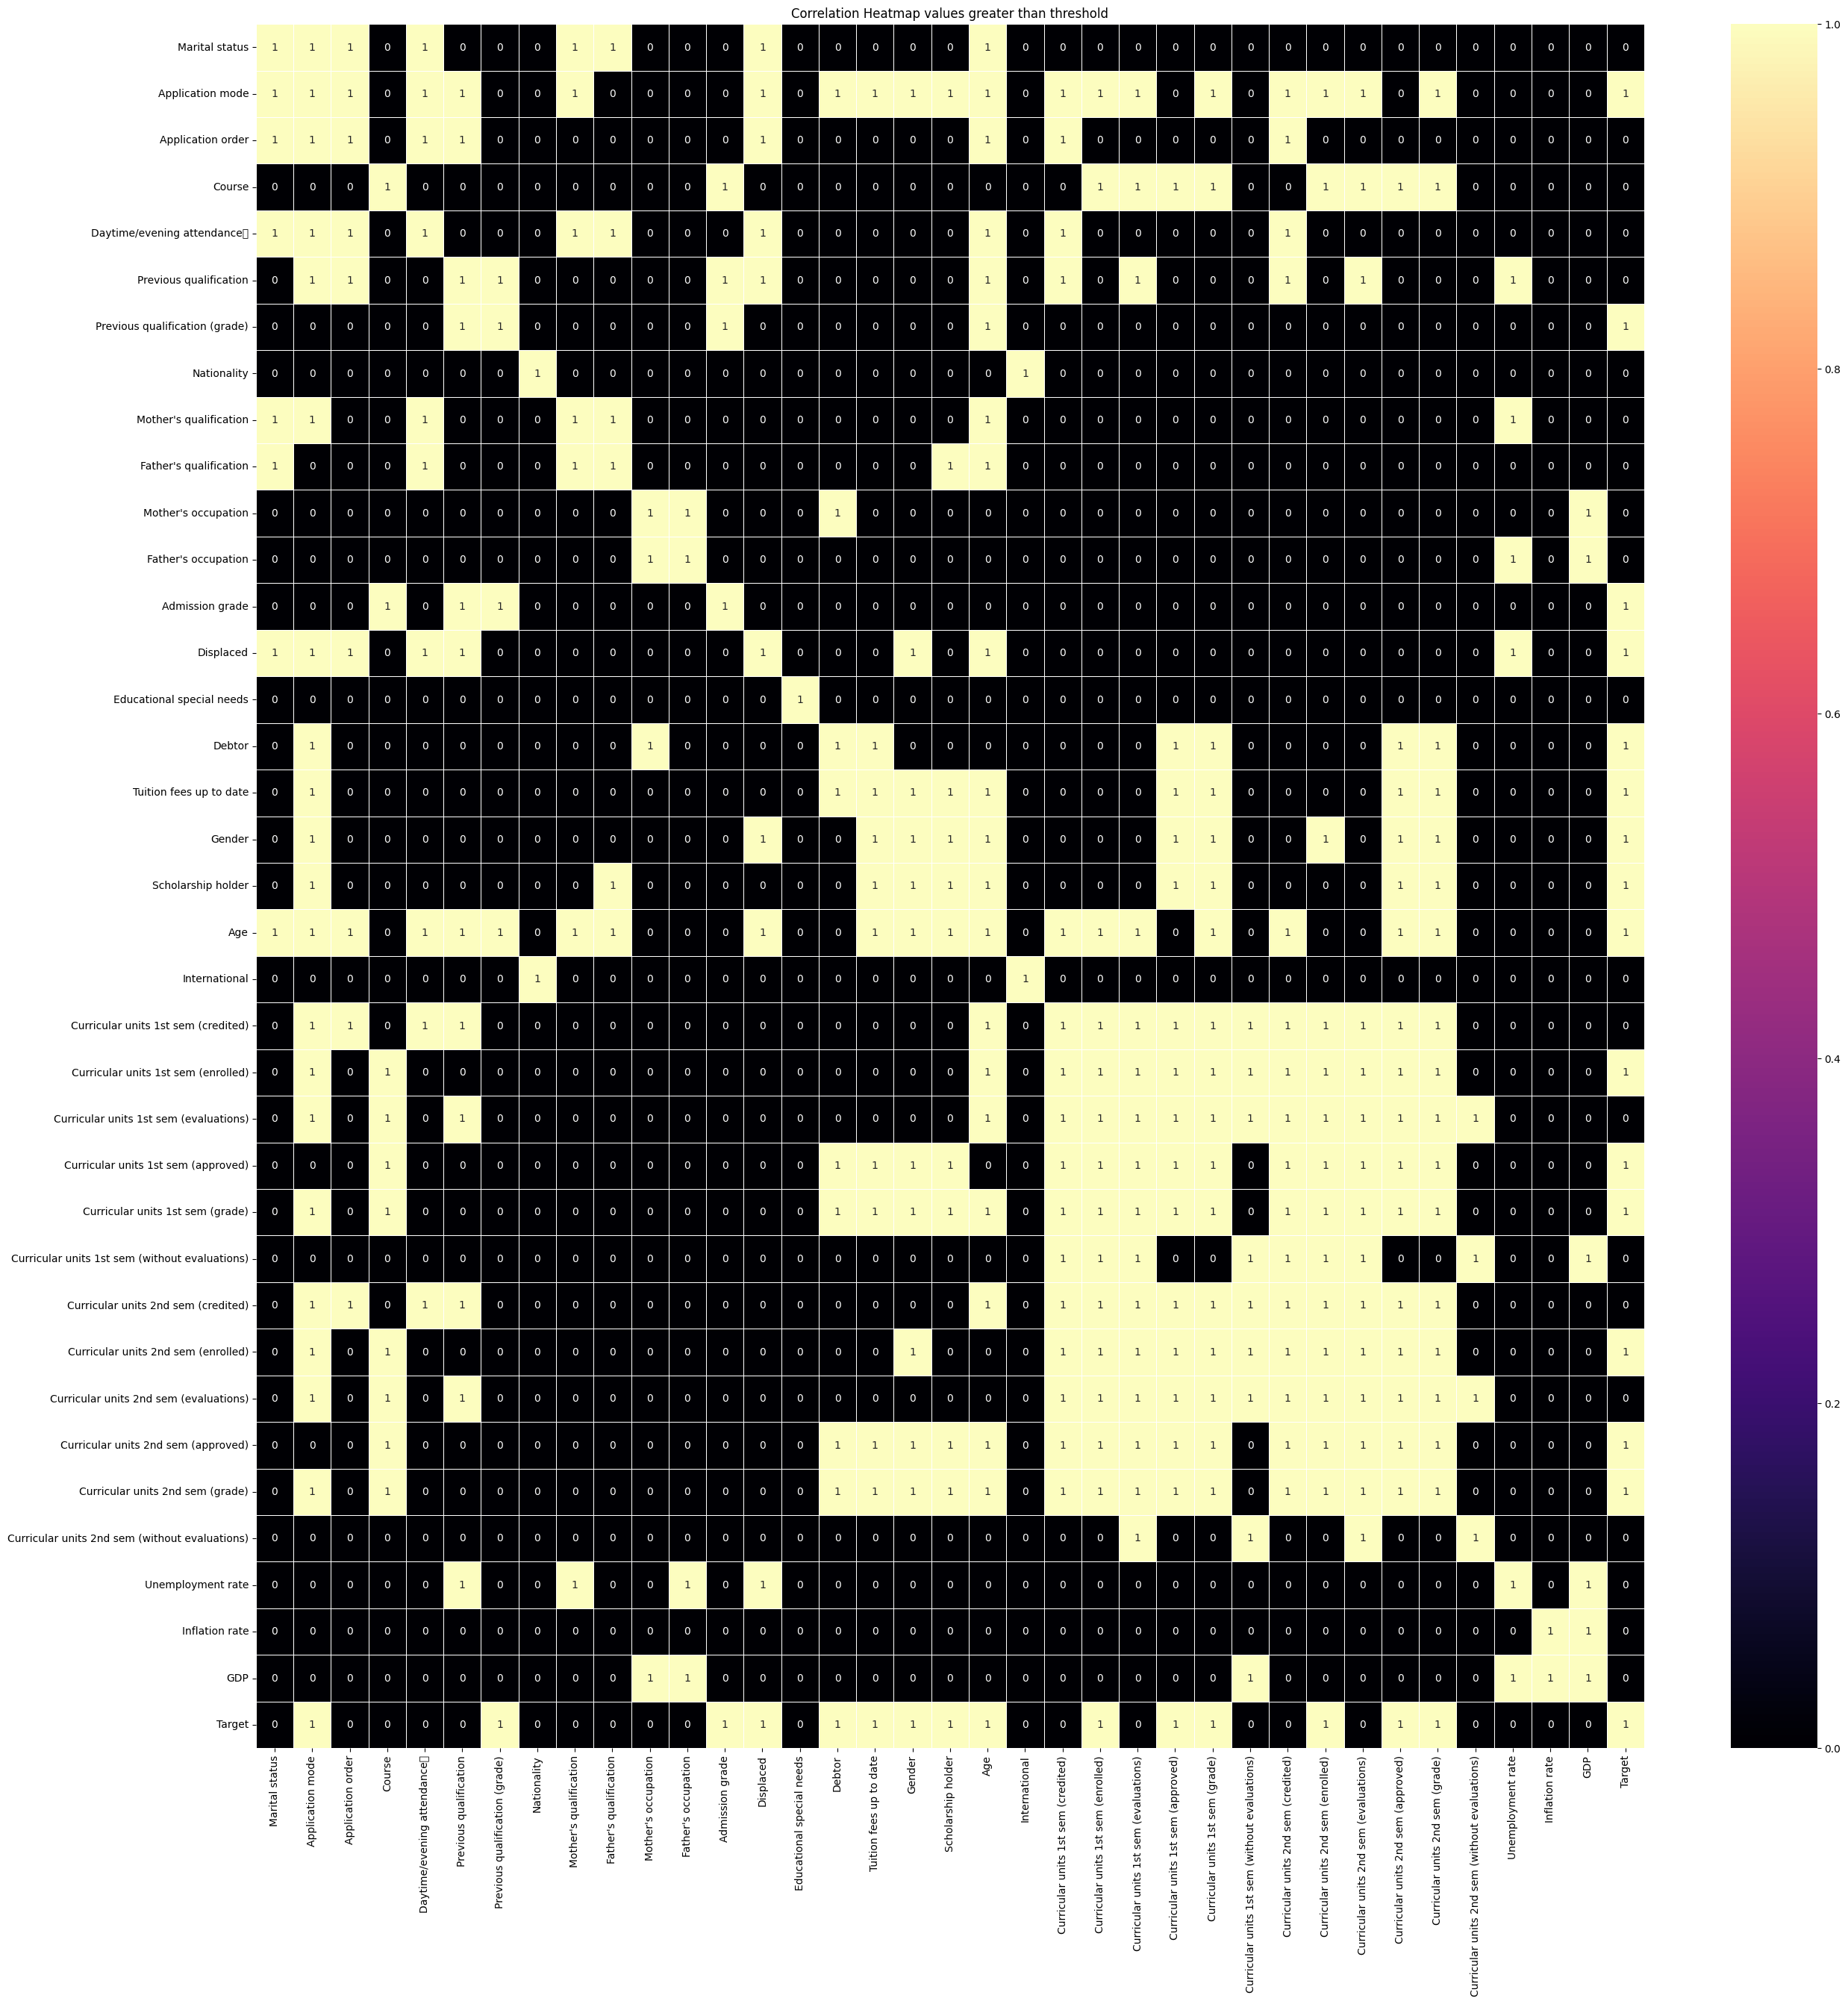

In [10]:
plt.figure(figsize=(30, 30))
sns.heatmap(ds.corr() , annot=True,cmap='magma', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

plt.figure(figsize=(30, 30))
sns.heatmap(abs(ds.corr())>0.1 , annot=True,cmap='magma', linewidths=0.5)
plt.title('Correlation Heatmap values greater than threshold')
plt.show()

Top 10 highly correlated features.

In [11]:
ds.corr()['Target'].sort_values(ascending=False)[1:10]

Curricular units 2nd sem (approved)    0.624157
Curricular units 2nd sem (grade)       0.566827
Curricular units 1st sem (approved)    0.529123
Curricular units 1st sem (grade)       0.485207
Tuition fees up to date                0.409827
Scholarship holder                     0.297595
Curricular units 2nd sem (enrolled)    0.175847
Curricular units 1st sem (enrolled)    0.155974
Admission grade                        0.120889
Name: Target, dtype: float64

We can remove the features whose absolute correlation value is close to 0.

In [12]:
ds.drop(columns=['Nationality', 'Mother\'s qualification', 
                                  'Father\'s qualification', 
                                  'Educational special needs', 
                                  'International', 
                                  'Curricular units 1st sem (without evaluations)',
                                  'Unemployment rate', 
                                  'Inflation rate'], axis=1,inplace=True)

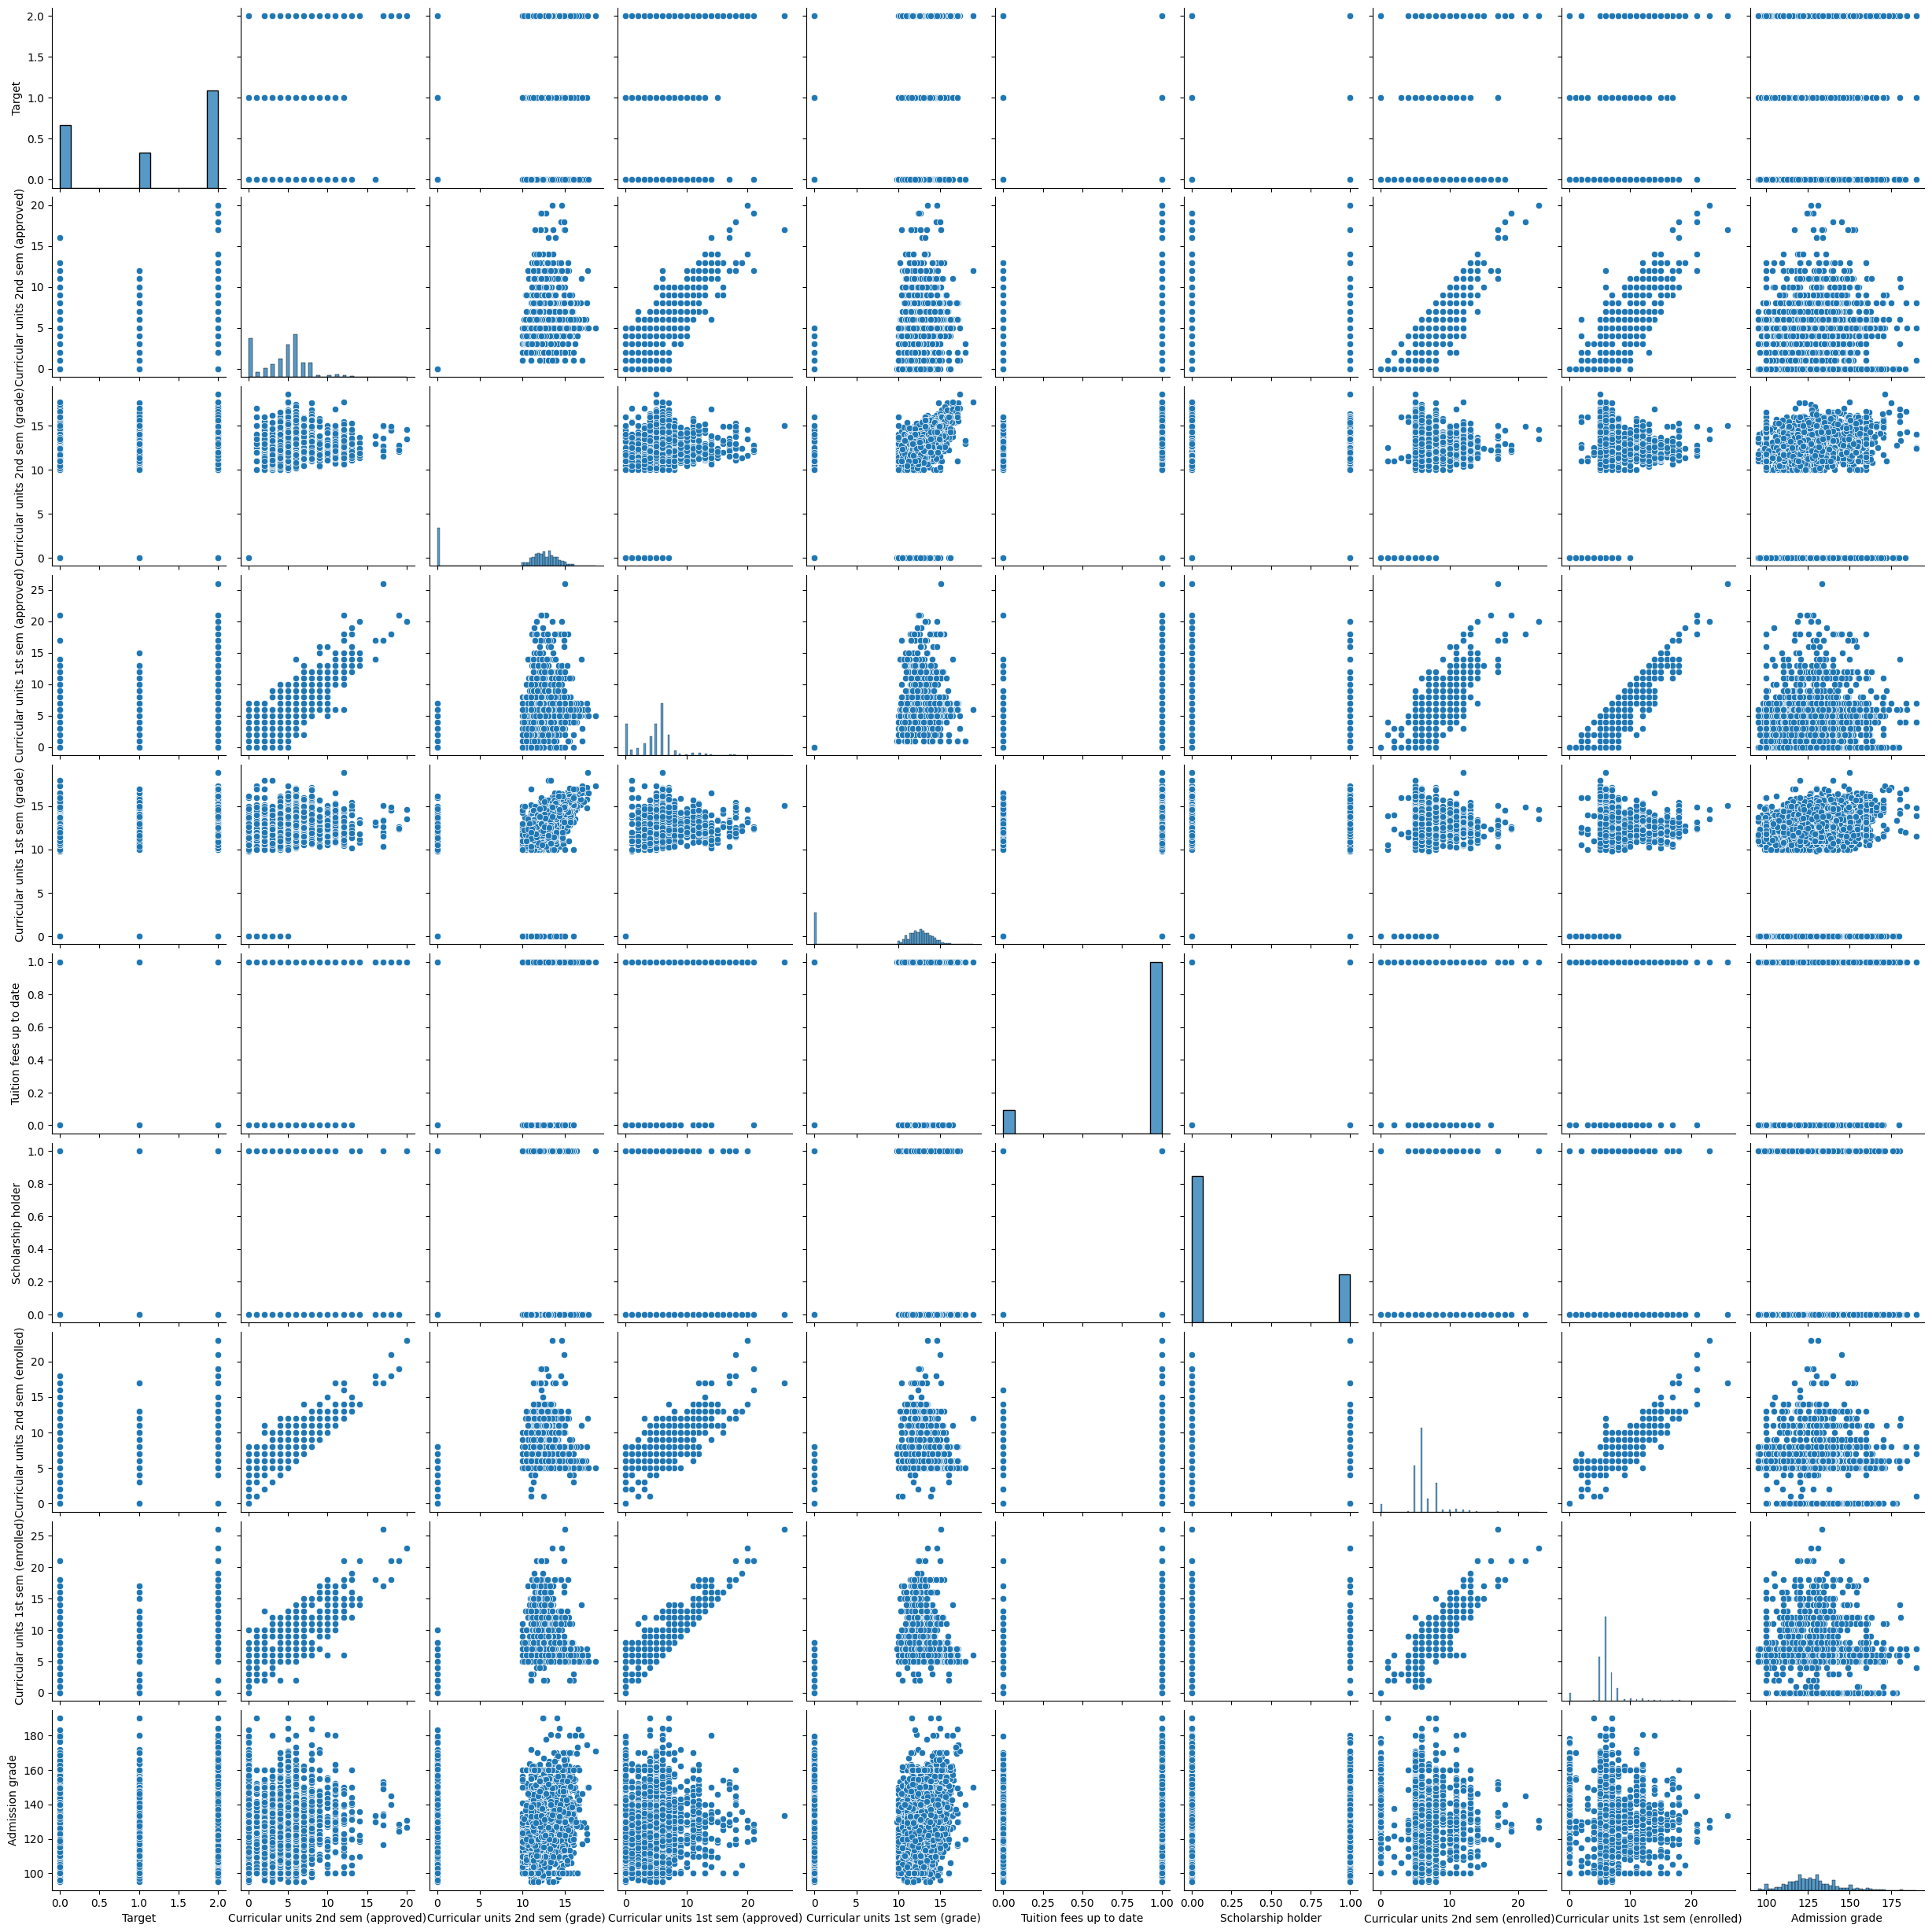

In [13]:
sns.pairplot(ds, vars = ds.corr()['Target'].sort_values(ascending=False)[0:10].index)
plt.show()

This is inter-correlation plot between the top 10 features based on correlation.

### Data Pre-Processing

In [14]:
X = ds.drop('Target', axis=1)
y = ds['Target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

### Modelling

In [17]:
decision_tree_model = DecisionTreeClassifier(random_state=0)
random_forest_model = RandomForestClassifier(random_state=2)
logistic_regression_model = LogisticRegression(random_state=42)
k_nearest_neighbour_model = KNeighborsClassifier(n_neighbors=3)
ADA_boost_model = AdaBoostClassifier(n_estimators=50,learning_rate=1, random_state=0)
GradientBoost_model = XGBClassifier(tree_method='gpu_hist')
support_vector_model = svm.SVC(kernel='linear',probability=True)

In [18]:
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train) 
logistic_regression_model.fit(X_train, y_train) 
k_nearest_neighbour_model.fit(X_train, y_train) 
ADA_boost_model.fit(X_train, y_train) 
GradientBoost_model.fit(X_train, y_train) 
support_vector_model.fit(X_train, y_train) 



c:\Users\shara\Desktop\EducationDropoutClassification\EduDrop\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\shara\Desktop\EducationDropoutClassification\EduDrop\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:07:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  wa

SVC(kernel='linear', probability=True)

In [34]:
model_list = [decision_tree_model, random_forest_model,logistic_regression_model,
k_nearest_neighbour_model, 
ADA_boost_model, 
GradientBoost_model, 
support_vector_model ]
for model in model_list:
    y_pred = model.predict(X_test)
    print("Accuracy of model {} :".format(str(model).split('(')[0]),round(accuracy_score(y_test,y_pred)*100,2),"%")
    print("Weighted F1 of model {} :".format(str(model).split('(')[0]),round(f1_score(y_test,y_pred,average='weighted')*100,2),"%")
    print("Precision Score of model {} :".format(str(model).split('(')[0]),round(precision_score(y_test,y_pred,average='weighted')*100,2),"%")
    print("Recall Score of model {} :".format(str(model).split('(')[0]),round(recall_score(y_test,y_pred,average='weighted')*100,2),"%")
    print("\n")

Accuracy of model DecisionTreeClassifier : 67.8 %
Weighted F1 of model DecisionTreeClassifier : 68.26 %
Precision Score of model DecisionTreeClassifier : 68.92 %
Recall Score of model DecisionTreeClassifier : 67.8 %


Accuracy of model RandomForestClassifier : 80.68 %
Weighted F1 of model RandomForestClassifier : 79.64 %
Precision Score of model RandomForestClassifier : 79.65 %
Recall Score of model RandomForestClassifier : 80.68 %


Accuracy of model LogisticRegression : 66.89 %
Weighted F1 of model LogisticRegression : 62.48 %
Precision Score of model LogisticRegression : 61.31 %
Recall Score of model LogisticRegression : 66.89 %


Accuracy of model KNeighborsClassifier : 62.82 %
Weighted F1 of model KNeighborsClassifier : 61.57 %
Precision Score of model KNeighborsClassifier : 60.84 %
Recall Score of model KNeighborsClassifier : 62.82 %


Accuracy of model AdaBoostClassifier : 77.4 %
Weighted F1 of model AdaBoostClassifier : 76.22 %
Precision Score of model AdaBoostClassifier : 75.7

### Using Ensemble techniques to boost accuracy

In [36]:
ensemble_model = VotingClassifier(estimators=[('rfc', random_forest_model), ('lr', logistic_regression_model), ('abc',ADA_boost_model), ('xbc',GradientBoost_model)], voting='soft')
ensemble_model.fit(X_train, y_train)

y_pred = ensemble_model.predict(X_test)
print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")
print("Weighted F1 of model {} :".format(str(model).split('(')[0]),round(f1_score(y_test,y_pred,average='weighted')*100,2),"%")
print("Precision Score of model {} :".format(str(model).split('(')[0]),round(precision_score(y_test,y_pred,average='weighted')*100,2),"%")
print("Recall Score of model {} :".format(str(model).split('(')[0]),round(recall_score(y_test,y_pred,average='weighted')*100,2),"%")
print("\n")

c:\Users\shara\Desktop\EducationDropoutClassification\EduDrop\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\shara\Desktop\EducationDropoutClassification\EduDrop\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:33:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  wa

Accuracy : 80.23 %
Weighted F1 of model SVC : 79.09 %
Precision Score of model SVC : 79.2 %
Recall Score of model SVC : 80.23 %




c:\Users\shara\Desktop\EducationDropoutClassification\EduDrop\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:33:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
